In [1]:
!pip install numpy
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)


In [4]:
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.tail()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
data.shape

(569, 32)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64

In [11]:
data.drop('ID', axis=1, inplace=True)

In [12]:
data.head(10)

,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [13]:
# Categorical column count for 'Diagnosis'
categorical_count = data["Diagnosis"].value_counts()

# Counting the number of categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Categorical columns are of 'object' type
numerical_columns = data.select_dtypes(include=[np.number]).columns  # Numerical columns are of 'number' type

# Displaying the counts for each
print("\nCategorical Label Counts (Diagnosis):")
print(categorical_count)

print(f"\nTotal Categorical Columns: {len(categorical_columns)}")
print(f"Total Numerical Columns: {len(numerical_columns)}")

# You can also print the actual columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Categorical Label Counts (Diagnosis):
B    357
M    212
Name: Diagnosis, dtype: int64

Total Categorical Columns: 1
Total Numerical Columns: 30

Numerical Columns:
Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
       'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30'],
      dtype='object')

Categorical Columns:
Index(['Diagnosis'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["Diagnosis"])

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("Diagnosis", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)
data_scaled["Diagnosis"] = data["Diagnosis"]

In [16]:
#MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the numerical columns for scaling
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Fit and transform the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Now, data is scaled between 0 and 1
print(data.head())


   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0        1.0   0.521037   0.022658   0.545989   0.363733   0.593753   
1        1.0   0.643144   0.272574   0.615783   0.501591   0.289880   
2        1.0   0.601496   0.390260   0.595743   0.449417   0.514309   
3        1.0   0.210090   0.360839   0.233501   0.102906   0.811321   
4        1.0   0.629893   0.156578   0.630986   0.489290   0.430351   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0   0.792037   0.703140   0.731113   0.686364  ...    0.620776    0.141525   
1   0.181768   0.203608   0.348757   0.379798  ...    0.606901    0.303571   
2   0.431017   0.462512   0.635686   0.509596  ...    0.556386    0.360075   
3   0.811361   0.565604   0.522863   0.776263  ...    0.248310    0.385928   
4   0.347893   0.463918   0.518390   0.378283  ...    0.519744    0.123934   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    0.668310    0.450698  

In [17]:
#Standardization (Z-score Scaling)

# Initialize the scaler
scaler = StandardScaler()

# Select the numerical columns for scaling
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Fit and transform the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# data is standardized with a mean of 0 and standard deviation of 1
print(data.head())

   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   1.297676   1.097064  -2.073335   1.269934   0.984375   1.568466   
1   1.297676   1.829821  -0.353632   1.685955   1.908708  -0.826962   
2   1.297676   1.579888   0.456187   1.566503   1.558884   0.942210   
3   1.297676  -0.768909   0.253732  -0.592687  -0.764464   3.283553   
4   1.297676   1.750297  -1.151816   1.776573   1.826229   0.280372   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0   3.283515   2.652874   2.532475   2.217515  ...    1.886690   -1.359293   
1  -0.487072  -0.023846   0.548144   0.001392  ...    1.805927   -0.369203   
2   1.052926   1.363478   2.037231   0.939685  ...    1.511870   -0.023974   
3   3.402909   1.915897   1.451707   2.867383  ...   -0.281464    0.133984   
4   0.539340   1.371011   1.428493  -0.009560  ...    1.298575   -1.466770   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.303601    2.001237  

In [18]:
#Using the IQR Method
# Create a DataFrame to store outlier information
outlier_info = {}

# Loop through each numerical column to find outliers
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = outliers.shape[0]  # Count of outliers
    
    # Optional: Print outliers for each column
    print(f"Outliers in {col}:")
    print(outliers)

# Display the count of outliers for each numerical column
print("Count of Outliers for Each Numerical Column:")
print(outlier_info)


Outliers in Diagnosis:
Empty DataFrame
Columns: [Diagnosis, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30]
Index: []

[0 rows x 31 columns]
Outliers in Feature_1:
     Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
82    1.297676   3.150487   1.307894   3.275896   3.478653   0.707364   
108   1.297676   2.312645   0.088510   2.505640   2.429179   2.579016   
122   1.297676   2.874993   0.211845   3.057588   3.145893   3.440117   
164   1.297676   2.596659   0.640025   2.476807   2.932585  -0.851870   
180   1.297676   3.718515   0.600465   3.712513   4.536659   0.927977   
202   1.297676   2.602339   1.717457   2.756900   2.929741   1.262455   
212   1.297676   3.971

In [19]:
# Create a DataFrame to store outlier information
outlier_info = {}

# Get the total number of rows in the dataset
total_rows = data.shape[0]

# Loop through each numerical column to find outliers
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]  # Count of outliers
    outlier_percentage = (outlier_count / total_rows) * 100  # Percentage of outliers
    
    # Store count and percentage in outlier_info dictionary
    outlier_info[col] = {
        'Count': outlier_count,
        'Percentage': outlier_percentage
    }
    
    # Optional: Print outliers for each column
    print(f"Outliers in {col}:")
    print(outliers)

# Display the count and percentage of outliers for each numerical column
print("\nCount and Percentage of Outliers for Each Numerical Column:")
for col, info in outlier_info.items():
    print(f"{col}: Count = {info['Count']}, Percentage = {info['Percentage']:.2f}%")


Outliers in Diagnosis:
Empty DataFrame
Columns: [Diagnosis, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30]
Index: []

[0 rows x 31 columns]
Outliers in Feature_1:
     Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
82    1.297676   3.150487   1.307894   3.275896   3.478653   0.707364   
108   1.297676   2.312645   0.088510   2.505640   2.429179   2.579016   
122   1.297676   2.874993   0.211845   3.057588   3.145893   3.440117   
164   1.297676   2.596659   0.640025   2.476807   2.932585  -0.851870   
180   1.297676   3.718515   0.600465   3.712513   4.536659   0.927977   
202   1.297676   2.602339   1.717457   2.756900   2.929741   1.262455   
212   1.297676   3.971

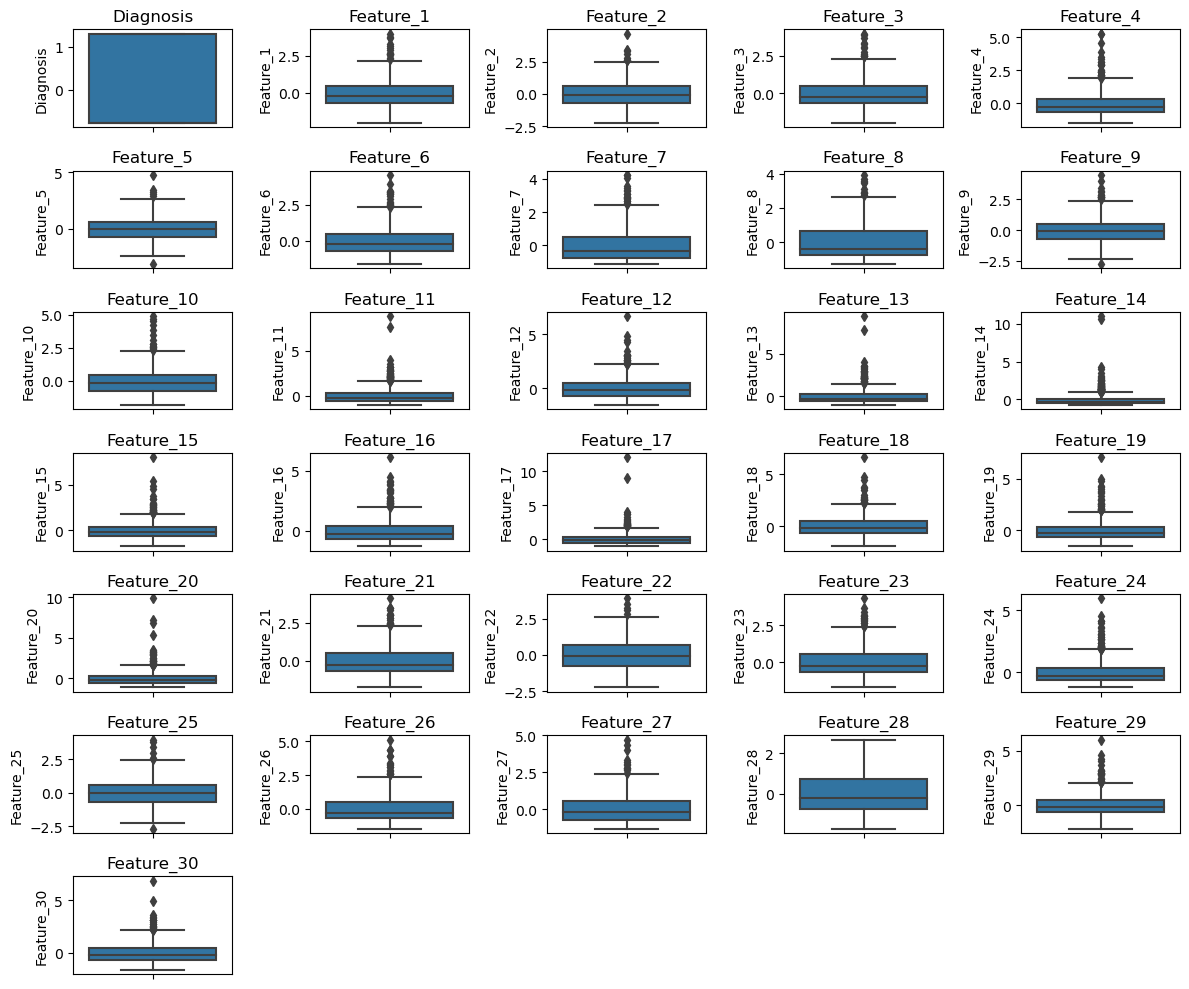

In [20]:
#Using BoxPlots
# Set the figure size for better visibility
plt.figure(figsize=(12, 10))  # Adjust size as needed

# Create a box plot for each numerical feature
for i, col in enumerate(numerical_cols):
    plt.subplot(7, 5, i + 1)  # Adjusting the grid to 7 rows and 5 columns
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


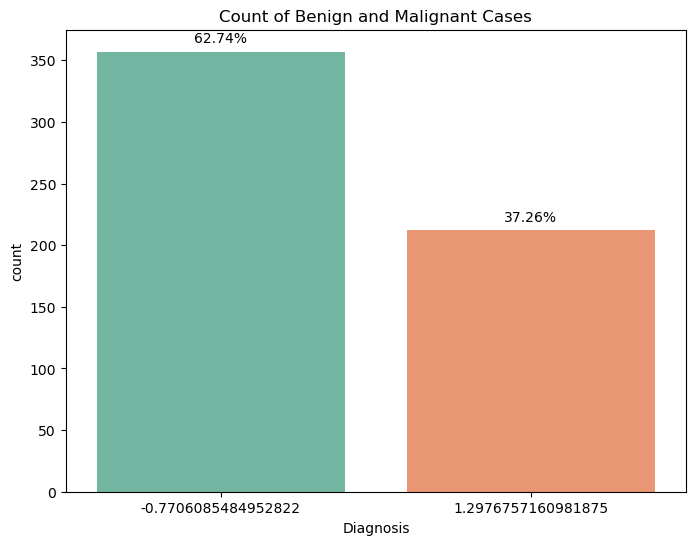

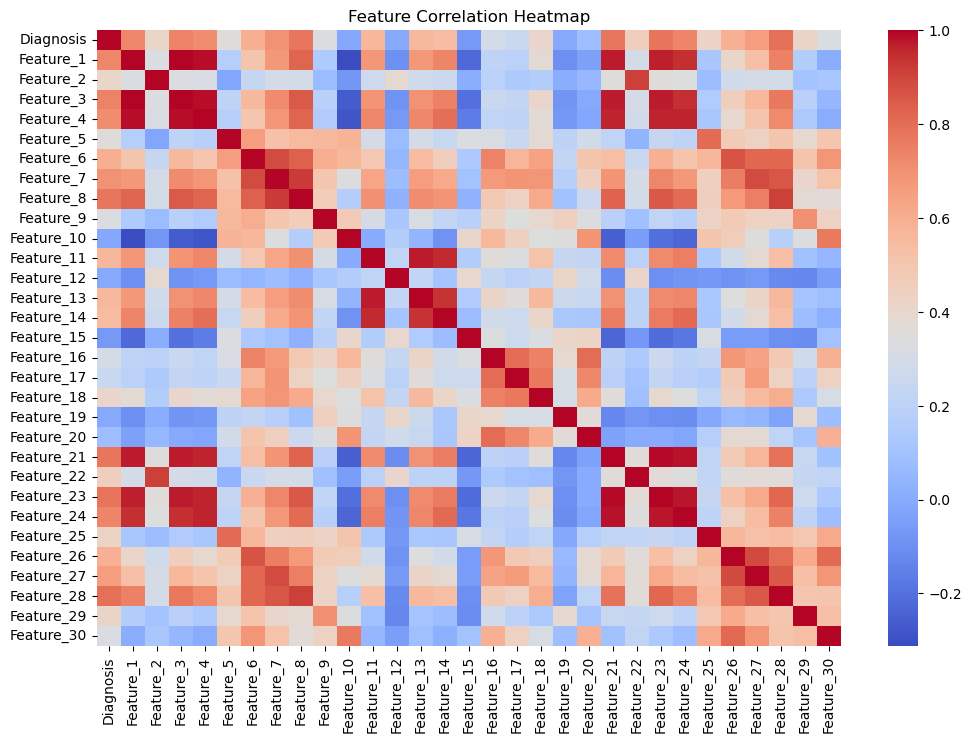

Highly correlated feature pairs:
Feature_1 and Diagnosis: Correlation = 0.73
Feature_3 and Diagnosis: Correlation = 0.74
Feature_3 and Feature_1: Correlation = 1.00
Feature_4 and Diagnosis: Correlation = 0.71
Feature_4 and Feature_1: Correlation = 0.99
Feature_4 and Feature_3: Correlation = 0.99
Feature_7 and Feature_3: Correlation = 0.72
Feature_7 and Feature_6: Correlation = 0.88
Feature_8 and Diagnosis: Correlation = 0.78
Feature_8 and Feature_1: Correlation = 0.82
Feature_8 and Feature_3: Correlation = 0.85
Feature_8 and Feature_4: Correlation = 0.82
Feature_8 and Feature_6: Correlation = 0.83
Feature_8 and Feature_7: Correlation = 0.92
Feature_11 and Feature_4: Correlation = 0.73
Feature_13 and Feature_4: Correlation = 0.73
Feature_13 and Feature_8: Correlation = 0.71
Feature_13 and Feature_11: Correlation = 0.97
Feature_14 and Feature_1: Correlation = 0.74
Feature_14 and Feature_3: Correlation = 0.74
Feature_14 and Feature_4: Correlation = 0.80
Feature_14 and Feature_11: Correlat

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of the target variable (Benign vs Malignant) with percentages
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diagnosis', data=data, palette="Set2")  # Change the color palette here
plt.title('Count of Benign and Malignant Cases')

# Add percentages on top of each bar
total = len(data)  # Total number of cases
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + 5, percentage, ha="center", va="bottom")

plt.show()

# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Print pairs of features with high correlation
correlation_matrix = data.corr().abs()  # Take absolute values for easy comparison
high_corr = correlation_matrix[correlation_matrix > 0.7]  # Adjust threshold as needed
correlated_pairs = []

for i in range(len(high_corr.columns)):
    for j in range(i):
        if high_corr.iloc[i, j] > 0.7:  # Adjust threshold as desired
            correlated_pairs.append((high_corr.columns[i], high_corr.columns[j], high_corr.iloc[i, j]))

print("Highly correlated feature pairs:")
for pair in correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")


In [22]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


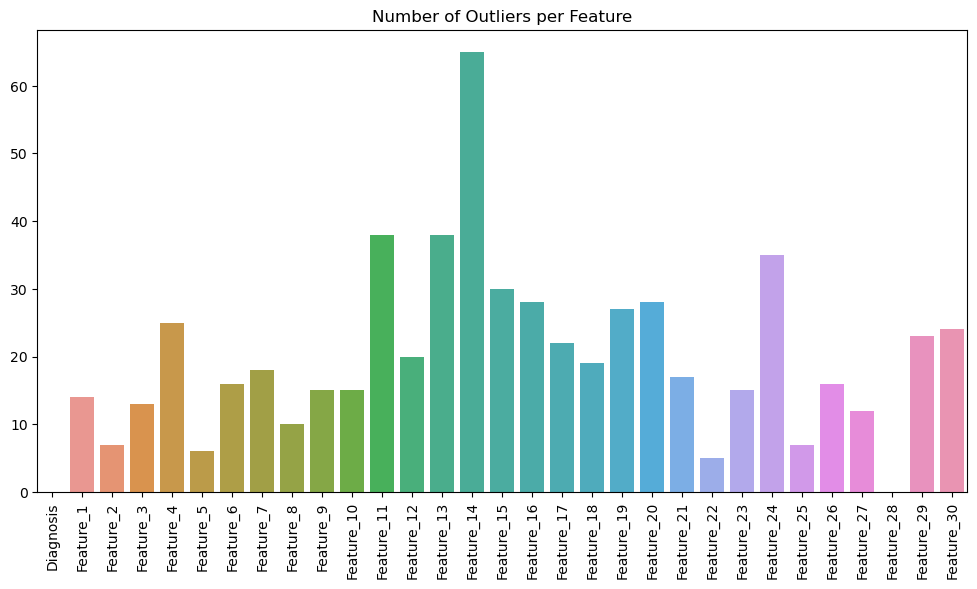

In [23]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()
# Visualize the number of outliers per feature
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.show()



In [24]:
# Identifying strongly correlated, weakly correlated features
strong_positive = []
strong_negative = []
weakly_correlated = []

# Loop through the correlation matrix to identify correlations
for feature in correlation_matrix.columns:
    for target in correlation_matrix.columns:
        if feature != target:
            correlation_value = correlation_matrix[feature][target]
            # Strong positive correlation
            if correlation_value > 0.7:
                strong_positive.append((feature, target, correlation_value))
            # Strong negative correlation
            elif correlation_value < -0.7:
                strong_negative.append((feature, target, correlation_value))
            # Weak correlation
            elif -0.3 < correlation_value < 0.3:
                weakly_correlated.append((feature, target, correlation_value))

# Printing the features with the correlation strength
print("Strong Positive Correlations (r > 0.7):")
for pair in strong_positive:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

print("\nStrong Negative Correlations (r < -0.7):")
for pair in strong_negative:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

print("\nWeak Correlations (-0.3 < r < 0.3):")
for pair in weakly_correlated:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")


Strong Positive Correlations (r > 0.7):
Diagnosis & Feature_1: 0.73
Diagnosis & Feature_3: 0.74
Diagnosis & Feature_4: 0.71
Diagnosis & Feature_8: 0.78
Diagnosis & Feature_21: 0.78
Diagnosis & Feature_23: 0.78
Diagnosis & Feature_24: 0.73
Diagnosis & Feature_28: 0.79
Feature_1 & Diagnosis: 0.73
Feature_1 & Feature_3: 1.00
Feature_1 & Feature_4: 0.99
Feature_1 & Feature_8: 0.82
Feature_1 & Feature_14: 0.74
Feature_1 & Feature_21: 0.97
Feature_1 & Feature_23: 0.97
Feature_1 & Feature_24: 0.94
Feature_1 & Feature_28: 0.74
Feature_2 & Feature_22: 0.91
Feature_3 & Diagnosis: 0.74
Feature_3 & Feature_1: 1.00
Feature_3 & Feature_4: 0.99
Feature_3 & Feature_7: 0.72
Feature_3 & Feature_8: 0.85
Feature_3 & Feature_14: 0.74
Feature_3 & Feature_21: 0.97
Feature_3 & Feature_23: 0.97
Feature_3 & Feature_24: 0.94
Feature_3 & Feature_28: 0.77
Feature_4 & Diagnosis: 0.71
Feature_4 & Feature_1: 0.99
Feature_4 & Feature_3: 0.99
Feature_4 & Feature_8: 0.82
Feature_4 & Feature_11: 0.73
Feature_4 & Feature_

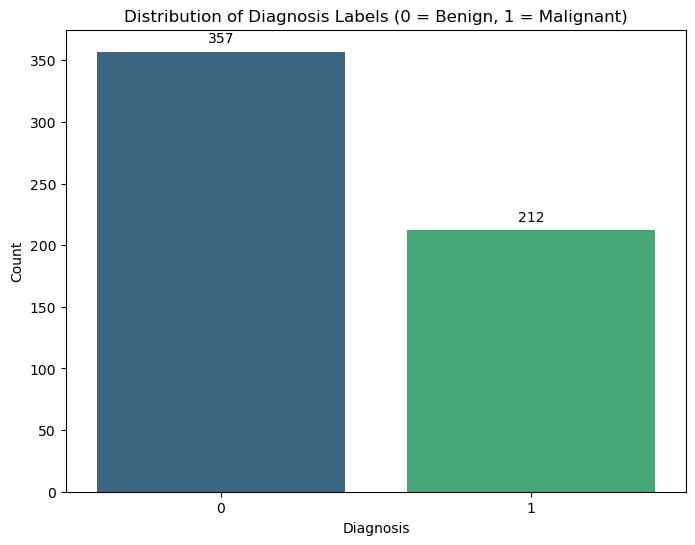

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data_scaled, palette="viridis")
plt.title("Distribution of Diagnosis Labels (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")

# Adding count labels on top of each bar
diagnosis_counts = data_scaled['Diagnosis'].value_counts()
for index, count in enumerate(diagnosis_counts):
    plt.text(x=index, y=count + 5, s=f"{count}", ha='center', va='bottom')

plt.show()



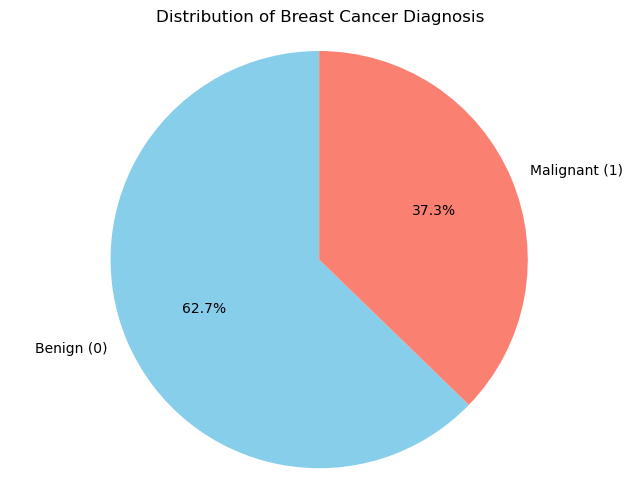

In [40]:
diagnosis_counts = data['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.axis('equal')
plt.show()


In [41]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64
No missing values found in the dataset.


In [26]:
# Splitting the Dataset
X = data_scaled.drop("Diagnosis", axis=1)
y = data_scaled["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (455, 30)
Testing data shape: (114, 30)


In [31]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [32]:
# Implementing AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Base estimator
    n_estimators=50,
    learning_rate=1.0,
    algorithm="SAMME",
    random_state=42
)

In [36]:
ada_classifier.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [37]:
from sklearn.metrics import f1_score
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [38]:
from tabulate import tabulate

# Model performance metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table in a boxed format
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Display Confusion Matrix in a boxed format
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="grid"))


Model Performance Metrics:
+----+-----------+----------+
|    | Metric    |    Score |
+====+===========+==========+
|  0 | Accuracy  | 0.973684 |
+----+-----------+----------+
|  1 | Precision | 0.97619  |
+----+-----------+----------+
|  2 | Recall    | 0.953488 |
+----+-----------+----------+
|  3 | F1 Score  | 0.964706 |
+----+-----------+----------+

Confusion Matrix:
+----------+---------------+---------------+
|          |   Predicted 0 |   Predicted 1 |
+==========+===============+===============+
| Actual 0 |            70 |             1 |
+----------+---------------+---------------+
| Actual 1 |             2 |            41 |
+----------+---------------+---------------+


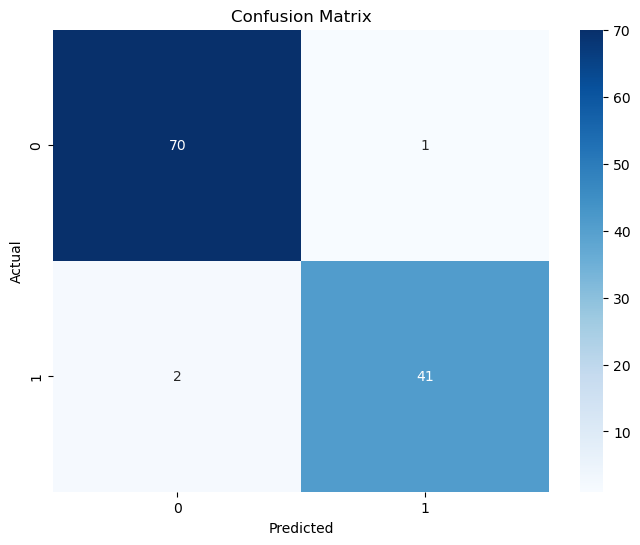

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()